# Exploratory Data Analysis 
## Predicting Gentrification in Denver, CO

### overview. 
Gentrification is becoming even more of a pressing issue as we see disadvantaged people pushed out of their neighborhoods as housing prices soar. I moved to Denver right after graduating college in 2016 and saw first hand how the city is changing, for better or for worse. 

I lived in Denver's historically black neighborhood, Five Points. When I looked around my neighborhood, I saw middle class white families walking their dogs, upscale fried chicken restaurants, and an expensive cafe juxtaposed against a family owned soul food restaurant, and old-school car repair shop, and derelict houses that lined Welton Street. 

Digging into the history of Five Points, it became apparent that the neighborhood has undergone a serious change in the past couple of years. The fancy fried chicken joint had replaced a family owned fried chicken joint. What used to be small, low cost shops were now breweries and yoga studios.  

From my casual observation, it appeared that this all had devastating effects on the black population of Five Points. It appeared that the black population now existed further east of Five Points, where the cost of living is cheaper.  

Specifically, I was curious as to how the legalization of marijuana in 2014 affected the rate of gentrification in Denver. Are we experiencing more gentrification now that marijuana is legal and Denver and other parts of the state are experiencing rapid population growth? 

Regardless of your stance on gentrification, it will be valuable for developers and city officials to understand if a certain neighborhood is gentrifying. Being able to predict gentrification will allow appropriate parties to better plan for the future and potentially protect residents from being displaced.  

### 1. Gentrification Definition
In an early attempt at this project, I used the following definition from Wikipedia to determine whether a census tract had gentrified from 2011 to 2016:

    "Whether gentrification has occurred in a census tract in an urban area in the United States during a particular 10-year period* between censuses can be determined by a method used in a study by Governing: If the census tract in a central city had 500 or more residents and at the time of the baseline census  had median household income and median home value in the bottom 40th percentile and at the time of the next 10-year census the tract's educational attainment (percentage of residents over age 25 with a bachelor's degree) was in the top 33rd percentile; the median home value, adjusted for inflation, had increased; and the percentage of increase in home values in the tract was in the top 33rd percentile when compared to the increase in other census tracts in the urban area  

then it was considered to have been gentrified.

/*   I didn’t want you to overlook this crucial detail! Standard gentrification models look over a 10-year period. I specifically chose to look at a 5-year window encompassing the time immediately before and immediately after the legalization of weed in Colorado. 


While this formula carries some significant gravitas behind it, I ultimately found that it was not a good fit for analyzing Denver’s changing urban landscape. From my observations of Denver while living here, this formula did not accurately classify census tracts as having gentrified or not. The above formula had to be tweaked to be more lenient to classify any census tract as having gentrified between 2011 and 2016. 

Therefore, I decided to parse out one quantifiable component of gentrification. For the purposes of this project, I chose to define gentrification in terms of the increase in rent from 2011 to 2016. 

### 2) Determine scale of gentrification from 2011 to 2016

Given that I was focused on rent increase as the sole measure of gentrification, the following procedure was conducted to extract the amount, in dollars, of the change in rent from 2011 to 2016. 

Data were gathered from the American Community Surveys from 2011 and 2016.  I pulled from the following three tables:
* Gross rent
* Median rent
* Gross rent by income 

I created two dataframes --2011 and 2016--that contained the data from these three tables respectively. 

With some simple math, I created a second dataframe to start building out a predictive model. This dataframe contains the median rent for both 2011 and 2016 as well as the difference between the two years. 

### Let's get started.
You can find the complete analysis in the script gentrification.py. Below I read in the dataframe created through the data cleaning phase.  

I have collected the following data for each census tract in Denver:


* Distance between census tract center and the CBD of Denver
* Number of historical homes
* Change in the number of people aged 18 years and under from 2000 and  2011
* Change in the number of couples without children from 2000 to 2001
* The number of people that lived at a different address in 2006
* Change in the percentage of women working in professional occupations from 2000 to  2011


In [2]:
import pandas as pd
df = pd.read_csv("predictor_vars.csv")
df.head()

,Unnamed: 0,Census Tract ID,Lon,Lat,Distance from CBD,Number of historical sites,Change in children,Change in households,Moved recently,Working women change
0,1,8031001702,-104.987385,39.740702,0.470088,1,-419.513,66.0,68.0,-538.744
1,2,8031001800,-104.987434,39.725843,1.361558,4,253.647,-104.0,379.0,-270.850
2,3,8031001901,-105.004235,39.740155,0.614803,1,-271.037,-95.0,197.0,-261.040
3,4,8031001902,-104.998592,39.740237,0.387398,1,-618.240,116.0,371.0,1313.940
4,5,8031002000,-104.987769,39.740130,0.479738,1,-448.176,-318.0,227.0,1082.568


### Setting up the Geo Dataframe for Plotting
Below I import the 2010 census tract shape file and convert it to so geopandas can handle it. Without the conversion, geopandas is unable to load the shape file!

In [179]:
import os
import geopandas as gpd 
from osgeo import ogr

path = r"C:\Users\bbenn\Documents\GitHub\predicting-gentrification\data\census_tracts_2010"
os.chdir(path)

driver = ogr.GetDriverByName("ESRI Shapefile")
ds = driver.Open("census_tracts_2010.shp", 0) #open your shapefile
#get its layer
layer = ds.GetLayer()

#create new shapefile to convert
ds2 = driver.CreateDataSource('convertedShape.shp')
#create a Polygon layer, as the one your Shapefile has
layer2 = ds2.CreateLayer('', None, ogr.wkbPolygon)
#iterate over all features of your original shapefile
for feature in layer:
   #and create a new feature on your converted shapefile with those features
   layer2.CreateFeature(feature)

ds = layer = ds2 = layer2 = None
denver.head()

,GEOID_NUM,POPULATION,HISPANIC_2,WHITE_2010,BLACK_2010,NATIVE_AM_,ASIAN_2010,HAWPACIS_2,OTHER_2010,TWO_OR_MOR,...,RENTED_A_4,RENTED_A_5,RENTED_A_6,RENTED_A_7,RENTED_A_8,SHAPE_Leng,SHAPE_Area,is_gent,btm_hs,geometry
TRACT_NAME,,,,,,,,,,,,,,,,,,,,,
Census Tract 17.01,8.031002e+09,4350.0,290.0,3539.0,94.0,16.0,327.0,1.0,2.0,81.0,...,96.0,97.0,195.0,127.0,41.0,0.046437,0.000120,0.0,1.0,POLYGON ((-104.9973077999999 39.75663102400006...
Census Tract 17.02,8.031002e+09,3648.0,355.0,2744.0,254.0,34.0,122.0,4.0,14.0,121.0,...,117.0,68.0,63.0,30.0,10.0,0.042534,0.000117,0.0,1.0,POLYGON ((-104.9873848339999 39.74070200400007...
Census Tract 18,8.031002e+09,3209.0,1091.0,1810.0,128.0,33.0,75.0,0.0,10.0,62.0,...,82.0,56.0,71.0,45.0,10.0,0.047632,0.000102,NaN,NaN,POLYGON ((-104.9874343089999 39.72584300300008...
Census Tract 19.01,8.031002e+09,2910.0,1416.0,708.0,565.0,28.0,88.0,1.0,11.0,93.0,...,43.0,32.0,78.0,36.0,14.0,0.064075,0.000245,NaN,NaN,POLYGON ((-105.0042347719999 39.74015545200007...
Census Tract 19.02,8.031002e+09,705.0,62.0,555.0,27.0,5.0,29.0,2.0,1.0,24.0,...,2.0,0.0,0.0,0.0,0.0,0.055663,0.000176,NaN,NaN,POLYGON ((-104.9985922579999 39.74023744300007...


In [180]:
%matplotlib inline
fp = "census_tracts_2010.shp"
denver = gpd.read_file(fp)
denver.loc[denver['GEOID_TRAC'] == '08031980000']

,TRACT_NAME,GEOID_TRAC,GEOID_NUM,POPULATION,HISPANIC_2,WHITE_2010,BLACK_2010,NATIVE_AM_,ASIAN_2010,HAWPACIS_2,...,RENTED_A_4,RENTED_A_5,RENTED_A_6,RENTED_A_7,RENTED_A_8,SHAPE_Leng,SHAPE_Area,is_gent,btm_hs,geometry
134,Census Tract 9800,08031980000,8.031980e+09,1165.0,234.0,504.0,333.0,6.0,38.0,2.0,...,3.0,4.0,0.0,1.0,0.0,0.632759,0.011455,NaN,NaN,POLYGON ((-104.6685471369999 39.90692088500003...


In [181]:
denver.head()

,TRACT_NAME,GEOID_TRAC,GEOID_NUM,POPULATION,HISPANIC_2,WHITE_2010,BLACK_2010,NATIVE_AM_,ASIAN_2010,HAWPACIS_2,...,RENTED_A_4,RENTED_A_5,RENTED_A_6,RENTED_A_7,RENTED_A_8,SHAPE_Leng,SHAPE_Area,is_gent,btm_hs,geometry
0,Census Tract 17.01,08031001701,8.031002e+09,4350.0,290.0,3539.0,94.0,16.0,327.0,1.0,...,96.0,97.0,195.0,127.0,41.0,0.046437,0.000120,0.0,1.0,POLYGON ((-104.9973077999999 39.75663102400006...
1,Census Tract 17.02,08031001702,8.031002e+09,3648.0,355.0,2744.0,254.0,34.0,122.0,4.0,...,117.0,68.0,63.0,30.0,10.0,0.042534,0.000117,0.0,1.0,POLYGON ((-104.9873848339999 39.74070200400007...
2,Census Tract 18,08031001800,8.031002e+09,3209.0,1091.0,1810.0,128.0,33.0,75.0,0.0,...,82.0,56.0,71.0,45.0,10.0,0.047632,0.000102,NaN,NaN,POLYGON ((-104.9874343089999 39.72584300300008...
3,Census Tract 19.01,08031001901,8.031002e+09,2910.0,1416.0,708.0,565.0,28.0,88.0,1.0,...,43.0,32.0,78.0,36.0,14.0,0.064075,0.000245,NaN,NaN,POLYGON ((-105.0042347719999 39.74015545200007...
4,Census Tract 19.02,08031001902,8.031002e+09,705.0,62.0,555.0,27.0,5.0,29.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.055663,0.000176,NaN,NaN,POLYGON ((-104.9985922579999 39.74023744300007...


In [182]:
denver.set_index('TRACT_NAME', inplace=True)
denver = denver.drop('Census Tract 9800')

In [184]:
denver_tract_geo = denver.set_index("GEOID_TRAC")['geometry']
denver_tract_geo.crs = {'init' :'epsg:3310'}

### Rent Increase
Where did rent increase the most in Denver from 2011 to 2016?

In [271]:
path = r"C:\Users\bbenn\Documents\GitHub\predicting-gentrification"
os.chdir(path)
rent_df = pd.read_csv("rent_increase.csv")
rent_df.head()

,Unnamed: 0,Census Tract,2011_Median_gross_rent,2016_Median_gross_rent,Increase
0,1,8031000102,876,1029,153
1,2,8031000201,975,1135,160
2,3,8031000202,782,680,-102
3,4,8031000301,699,1043,344
4,5,8031000302,925,1043,118


Let's remove the 2,000 increase in rent outlier

In [284]:
rent_df.loc[rent_df['Increase'] == 2112.000000]

,Unnamed: 0,Census Tract,2011_Median_gross_rent,2016_Median_gross_rent,Increase
84,86,8031004303,2,2114,2112


In [285]:
rent_df.drop(rent_df.index[84], inplace=True)

In [287]:
fips = rent_df['Census Tract']
rent = rent_df['Increase']
choropleth_rent = pd.concat([fips, rent], axis=1)
choropleth_rent['Census Tract'] = '0' + choropleth_rent['Census Tract'].astype(str)
choropleth_rent.set_index('Census Tract', inplace=True)
choropleth_rent.index.names = ['GEOID_TRAC']

Text(0.5,1,'Denver, CO- Rent Increase by Census Tract')

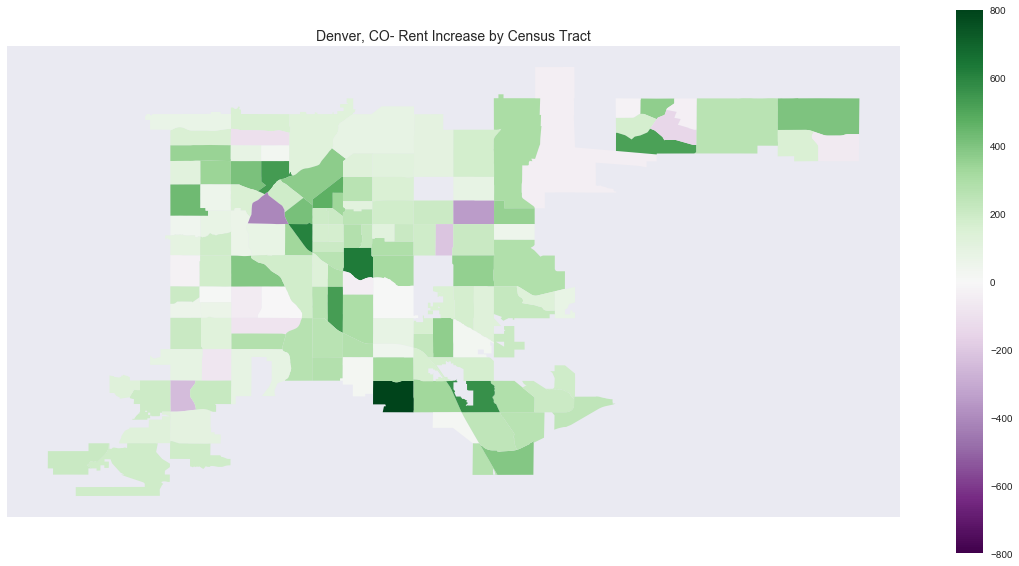

In [442]:
import matplotlib.pyplot as plt

denver_gdf = gpd.GeoDataFrame(geometry = denver_tract_geo, data = choropleth_rent)
fig, ax = plt.subplots(figsize=(20,10))
ax.set(aspect='equal', xticks=[], yticks=[])
denver_gdf.plot(column=  'Increase', ax = ax, cmap='PRGn', vmin=-800, vmax=800, legend=True)
plt.title('Denver, CO- Rent Increase by Census Tract', size = 14)

### Historical Sites

In [191]:
fips = df['Census Tract ID']
sites = df['Number of historical sites']
choropleth_sites = pd.concat([fips, sites], axis=1)
choropleth_sites['Census Tract ID'] = '0' + choropleth_sites['Census Tract ID'].astype(str)
choropleth_sites.set_index('Census Tract ID', inplace=True)
choropleth_sites.index.names = ['GEOID_TRAC']

Text(0.5,1,'Denver, CO- Number of historical sites by Census Tract')

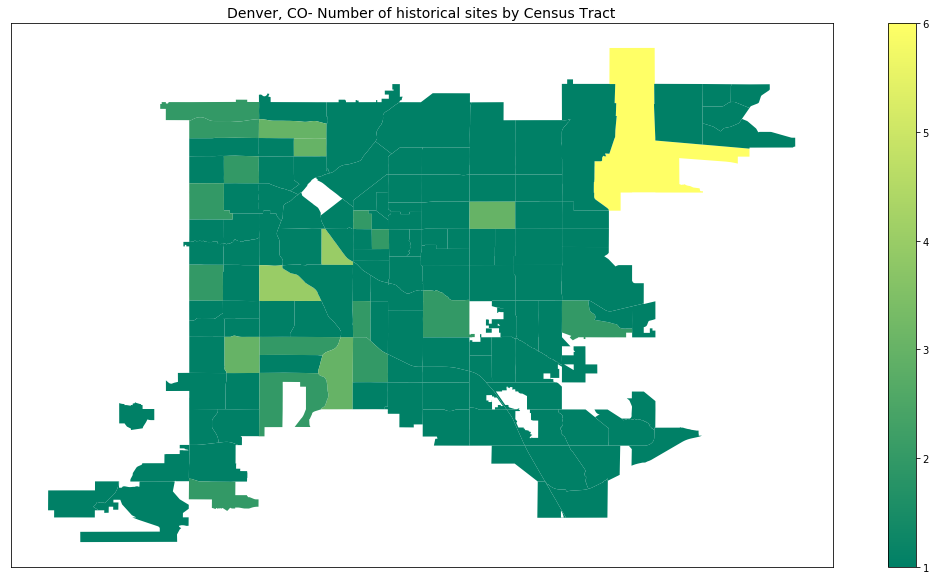

In [280]:
import matplotlib.pyplot as plt

denver_gdf = gpd.GeoDataFrame(geometry = denver_tract_geo, data = choropleth_sites)
fig, ax = plt.subplots(figsize=(20,10))
ax.set(aspect='equal', xticks=[], yticks=[])
denver_gdf.plot(column=  'Number of historical sites', ax = ax, cmap='summer', legend=True)
plt.title('Denver, CO- Number of historical sites by Census Tract', size = 14)

### Change in Children

In [192]:
fips = df['Census Tract ID']
children = df['Change in children']
choropleth_children = pd.concat([fips, children], axis=1)
choropleth_children['Census Tract ID'] = '0' + choropleth_children['Census Tract ID'].astype(str)
choropleth_children.set_index('Census Tract ID', inplace=True)
choropleth_children.index.names = ['GEOID_TRAC']

Text(0.5,1,'Denver, CO- Change in children by Census Tract')

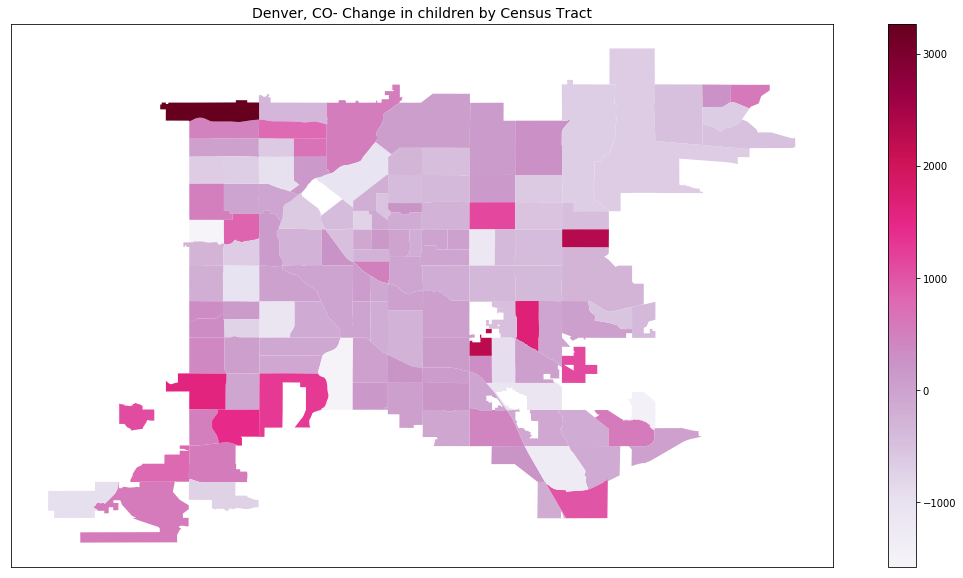

In [201]:
denver_gdf = gpd.GeoDataFrame(geometry = denver_tract_geo, data = choropleth_children)
fig, ax = plt.subplots(figsize=(20,10))
ax.set(aspect='equal', xticks=[], yticks=[])
denver_gdf.plot(column=  'Change in children', ax = ax, cmap='PuRd', legend=True)
plt.title('Denver, CO- Change in children by Census Tract', size = 14)

### Change in households

In [204]:
fips = df['Census Tract ID']
households = df['Change in households']
choropleth_households = pd.concat([fips, households], axis=1)
choropleth_households['Census Tract ID'] = '0' + choropleth_households['Census Tract ID'].astype(str)
choropleth_households.set_index('Census Tract ID', inplace=True)
choropleth_households.index.names = ['GEOID_TRAC']

Text(0.5,1,'Denver, CO- Change in households by Census Tract')

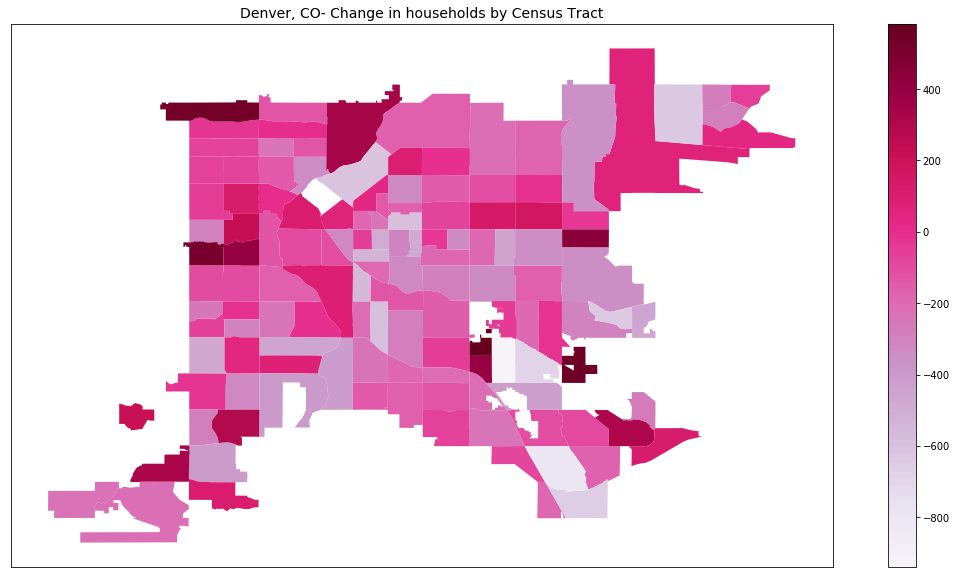

In [205]:
denver_gdf = gpd.GeoDataFrame(geometry = denver_tract_geo, data = choropleth_households)
fig, ax = plt.subplots(figsize=(20,10))
ax.set(aspect='equal', xticks=[], yticks=[])
denver_gdf.plot(column=  'Change in households', ax = ax, cmap='PuRd', legend=True)
plt.title('Denver, CO- Change in households by Census Tract', size = 14)

### Moved recently	

In [206]:
fips = df['Census Tract ID']
moved = df['Moved recently']
choropleth_moved = pd.concat([fips, moved], axis=1)
choropleth_moved['Census Tract ID'] = '0' + choropleth_moved['Census Tract ID'].astype(str)
choropleth_moved.set_index('Census Tract ID', inplace=True)
choropleth_moved.index.names = ['GEOID_TRAC']

Text(0.5,1,'Denver, CO- Moved recently by Census Tract')

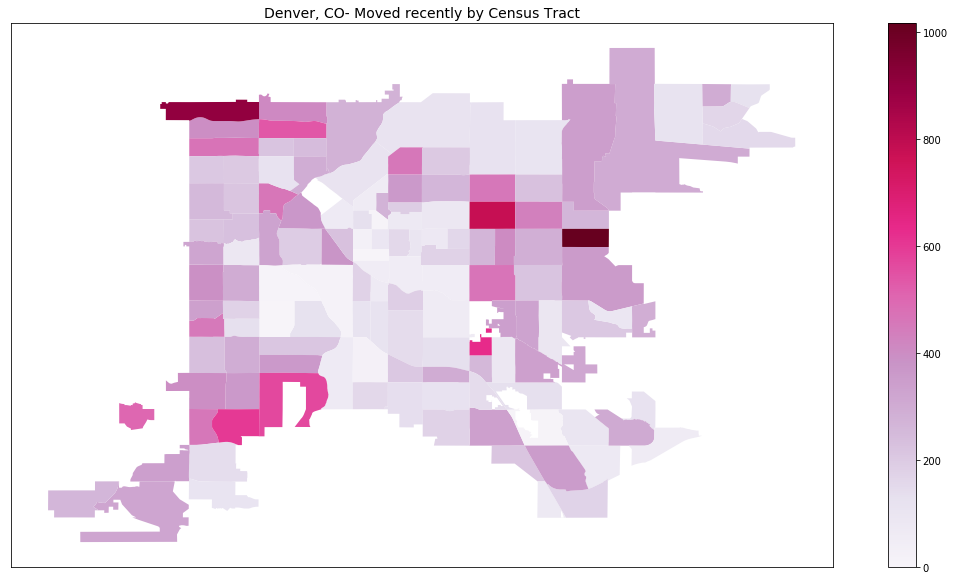

In [207]:
denver_gdf = gpd.GeoDataFrame(geometry = denver_tract_geo, data = choropleth_moved)
fig, ax = plt.subplots(figsize=(20,10))
ax.set(aspect='equal', xticks=[], yticks=[])
denver_gdf.plot(column=  'Moved recently', ax = ax, cmap='PuRd', legend=True)
plt.title('Denver, CO- Moved recently by Census Tract', size = 14)

### Working women change

In [209]:
fips = df['Census Tract ID']
women = df['Working women change']
choropleth_women = pd.concat([fips, women], axis=1)
choropleth_women['Census Tract ID'] = '0' + choropleth_women['Census Tract ID'].astype(str)
choropleth_women.set_index('Census Tract ID', inplace=True)
choropleth_women.index.names = ['GEOID_TRAC']

Text(0.5,1,'Denver, CO- Working women chage by Census Tract')

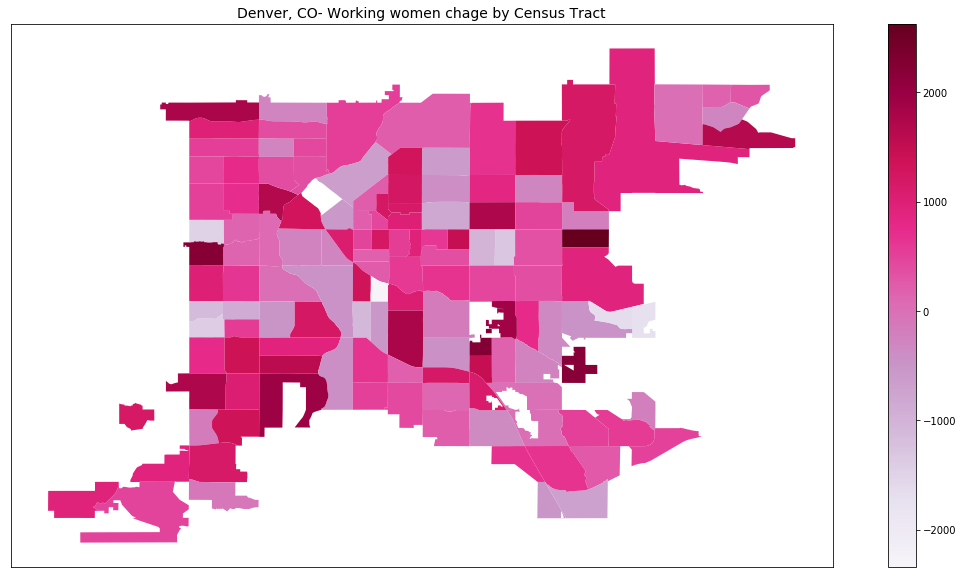

In [211]:
denver_gdf = gpd.GeoDataFrame(geometry = denver_tract_geo, data = choropleth_women)
fig, ax = plt.subplots(figsize=(20,10))
ax.set(aspect='equal', xticks=[], yticks=[])
denver_gdf.plot(column=  'Working women change', ax = ax, cmap='PuRd', legend=True)
plt.title('Denver, CO- Working women chage by Census Tract', size = 14)

## Correlation with Rent Increase

In [289]:
rent_df.head()

,Unnamed: 0,Census Tract,2011_Median_gross_rent,2016_Median_gross_rent,Increase
0,1,8031000102,876,1029,153
1,2,8031000201,975,1135,160
2,3,8031000202,782,680,-102
3,4,8031000301,699,1043,344
4,5,8031000302,925,1043,118


In [299]:
rent_df = rent_df[['Census Tract', 'Increase']]

In [303]:
predictor_vars = df[['Census Tract ID', 'Distance from CBD', 'Number of historical sites', 'Change in children', 'Change in households', 'Moved recently', 'Working women change']]
predictor_vars.columns.values[0] = "Census Tract"
predictor_vars.head()

,Census Tract,Distance from CBD,Number of historical sites,Change in children,Change in households,Moved recently,Working women change
0,8031001702,0.470088,1,-419.513,66.0,68.0,-538.744
1,8031001800,1.361558,4,253.647,-104.0,379.0,-270.850
2,8031001901,0.614803,1,-271.037,-95.0,197.0,-261.040
3,8031001902,0.387398,1,-618.240,116.0,371.0,1313.940
4,8031002000,0.479738,1,-448.176,-318.0,227.0,1082.568


In [345]:
gent = pd.merge(rent_df, predictor_vars, on='Census Tract',right_index=True, left_index=True)
gent.head()

,Census Tract,Increase,Distance from CBD,Number of historical sites,Change in children,Change in households,Moved recently,Working women change
0,8031000102,153,0.470088,1,-419.513,66.0,68.0,-538.744
1,8031000201,160,1.361558,4,253.647,-104.0,379.0,-270.850
2,8031000202,-102,0.614803,1,-271.037,-95.0,197.0,-261.040
3,8031000301,344,0.387398,1,-618.240,116.0,371.0,1313.940
4,8031000302,118,0.479738,1,-448.176,-318.0,227.0,1082.568


In [346]:
gent.loc[gent['Distance from CBD'] > 20]

,Census Tract,Increase,Distance from CBD,Number of historical sites,Change in children,Change in households,Moved recently,Working women change
133,8031012001,127,20.628558,2,154.28,-62.0,85.0,26.67


In [347]:
gent_cbd = gent.drop(gent.index[132])
gent_cbd.describe()

,Census Tract,Increase,Distance from CBD,Number of historical sites,Change in children,Change in households,Moved recently,Working women change
count,1.340000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,8.031004e+09,184.417910,4.210009,1.261194,-13.458209,-145.164179,240.567164,431.318507
std,2.647196e+03,180.509692,2.411309,0.714291,712.693049,269.305796,172.468694,882.526399
min,8.031000e+09,-410.000000,0.387398,1.000000,-1582.074000,-940.000000,0.000000,-2343.756000
25%,8.031002e+09,84.250000,2.320672,1.000000,-417.157250,-298.500000,116.750000,-183.795500
50%,8.031004e+09,189.500000,3.751733,1.000000,-40.233500,-148.500000,211.500000,470.804000
75%,8.031005e+09,277.750000,5.893677,1.000000,225.402250,-23.000000,337.000000,1028.936750
max,8.031012e+09,863.000000,9.987742,6.000000,3269.922000,583.000000,1016.000000,2627.386000


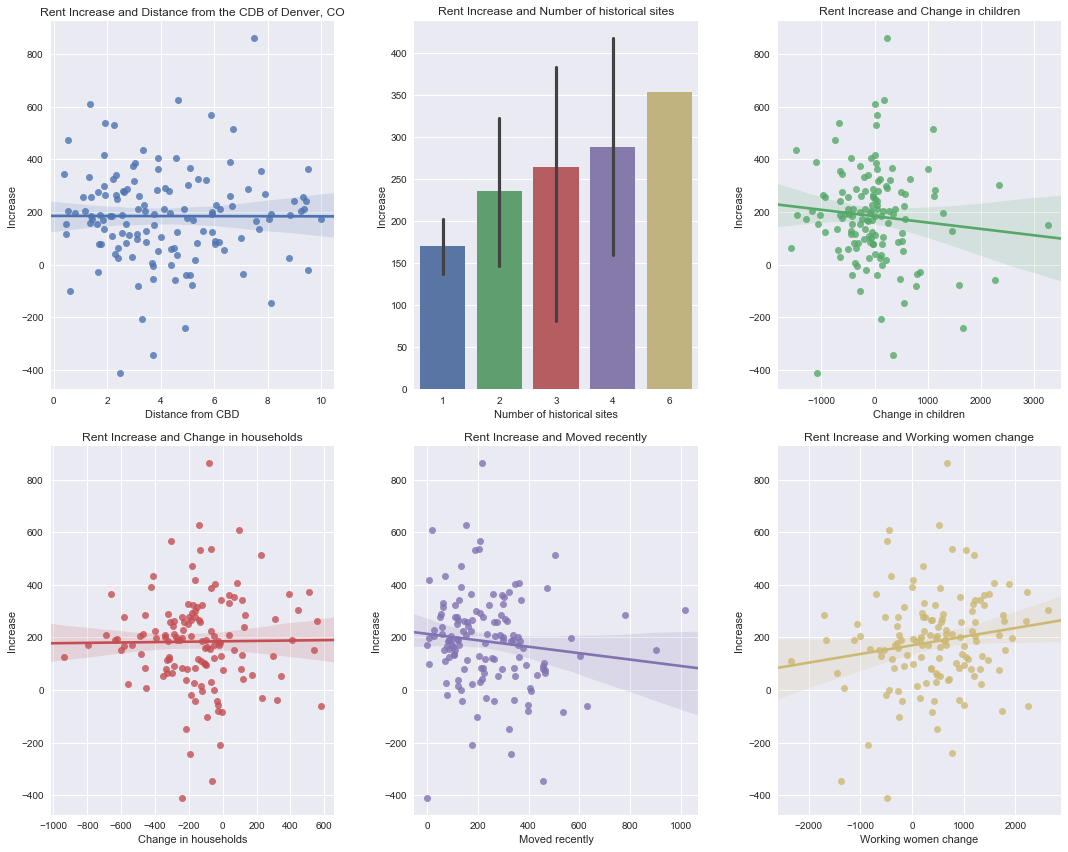

In [445]:
import seaborn as sns; sns.set(color_codes=True)

f, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3)
f.set_size_inches(15, 12)

plt1 = sns.regplot(x="Distance from CBD", y="Increase", data=gent_cbd, ax = ax1)
plt1.set_title('Rent Increase and Distance from the CDB of Denver, CO')

plt2 = sns.barplot(x="Number of historical sites", y="Increase", data=gent_cbd, ax = ax2)
plt2.set_title('Rent Increase and Number of historical sites')

plt2 = sns.regplot(x="Change in children", y="Increase", data=gent_cbd, ax = ax3)
plt2.set_title('Rent Increase and Change in children')

plt2 = sns.regplot(x="Change in households", y="Increase", data=gent_cbd, ax = ax4)
plt2.set_title('Rent Increase and Change in households')

plt2 = sns.regplot(x="Moved recently", y="Increase", data=gent_cbd, ax = ax5)
plt2.set_title('Rent Increase and Moved recently')

plt2 = sns.regplot(x="Working women change", y="Increase", data=gent_cbd, ax = ax6)
plt2.set_title('Rent Increase and Working women change')

plt.tight_layout()

In [446]:
f.savefig('correlation.png', bbox_inches='tight')
